In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [ ]:
import pandas as pd
x_train_ori = pd.read_csv("../../data/x_train_new.csv")
x_train_ori.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,Race_5,Att_Phy_tot_claims,Opr_Phy_tot_claims,Oth_Phy_tot_claims,Prv_Tot_Att_Opr_Oth_Phys,PRV_Tot_DGrpCodes,PRV_Tot_Unq_DOB_Years,PRV_Bene_Age_Sum,PRV_CoPayment,PRV_OP_Annual_ReImb_Amt
0,5.525612,0.000000,0.000000,0.000000,12.000000,12.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,0.000000,0.000000,2.0,0.0,2.0,74.350000,0.000000,7.624124
1,3.961804,1.162413,0.333333,0.166667,12.000000,12.000000,0.666667,0.583333,0.333333,0.083333,...,0.000000,2.166667,0.166667,0.250000,16.0,2.0,10.0,74.516667,1.162413,7.291025
2,4.662761,0.000000,0.375000,0.312500,12.000000,12.000000,0.437500,0.687500,0.562500,0.125000,...,0.000000,17.000000,2.250000,1.562500,27.0,0.0,13.0,68.131250,0.000000,7.346198
3,4.780181,0.709673,0.391304,0.205274,11.940128,11.935139,0.429081,0.612972,0.440485,0.160371,...,0.001426,26.811832,1.590164,6.294369,2230.0,110.0,62.0,75.368140,0.709673,6.922563
4,4.112503,0.214173,0.440678,0.203390,11.796610,11.966102,0.389831,0.661017,0.491525,0.152542,...,0.000000,3.288136,0.220339,0.355932,88.0,0.0,34.0,73.357627,0.214173,6.981401


In [ ]:
x_train_graph = pd.read_csv("../../data/x_train_graph_features.csv")
x_train_graph.head()

,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,1.0,0.000014,-4.041293e-20,0.000014,1.000000,0.000014,-8.948438e-21,0.000014
1,9.0,0.000124,-9.632725e-19,0.000063,1.000000,0.000066,-2.615565e-19,0.000008
2,1.0,0.000014,-1.844673e-19,0.000014,1.000000,0.000014,2.908017e-19,0.000014
3,100.0,0.170556,2.755025e-02,0.000579,2.662865,0.140279,2.432405e-03,0.000016
4,38.0,0.118946,7.172974e-05,0.000227,1.084746,0.105166,5.110236e-05,0.000008


In [ ]:
x_train_ori = pd.concat([x_train_ori, x_train_graph], axis = 1)
print(x_train_ori.shape)
x_train_ori.head()

(4328, 44)


,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,PRV_CoPayment,PRV_OP_Annual_ReImb_Amt,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,5.525612,0.000000,0.000000,0.000000,12.000000,12.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,7.624124,1.0,0.000014,-4.041293e-20,0.000014,1.000000,0.000014,-8.948438e-21,0.000014
1,3.961804,1.162413,0.333333,0.166667,12.000000,12.000000,0.666667,0.583333,0.333333,0.083333,...,1.162413,7.291025,9.0,0.000124,-9.632725e-19,0.000063,1.000000,0.000066,-2.615565e-19,0.000008
2,4.662761,0.000000,0.375000,0.312500,12.000000,12.000000,0.437500,0.687500,0.562500,0.125000,...,0.000000,7.346198,1.0,0.000014,-1.844673e-19,0.000014,1.000000,0.000014,2.908017e-19,0.000014
3,4.780181,0.709673,0.391304,0.205274,11.940128,11.935139,0.429081,0.612972,0.440485,0.160371,...,0.709673,6.922563,100.0,0.170556,2.755025e-02,0.000579,2.662865,0.140279,2.432405e-03,0.000016
4,4.112503,0.214173,0.440678,0.203390,11.796610,11.966102,0.389831,0.661017,0.491525,0.152542,...,0.214173,6.981401,38.0,0.118946,7.172974e-05,0.000227,1.084746,0.105166,5.110236e-05,0.000008


In [ ]:
y_train_ori = pd.read_csv("../../data/y_train_new.csv")
y_train_ori.head()

,PotentialFraud
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [ ]:
x_valid_ori = pd.read_csv("../../data/x_valid_new.csv")
x_valid_ori.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,Race_5,Att_Phy_tot_claims,Opr_Phy_tot_claims,Oth_Phy_tot_claims,Prv_Tot_Att_Opr_Oth_Phys,PRV_Tot_DGrpCodes,PRV_Tot_Unq_DOB_Years,PRV_Bene_Age_Sum,PRV_CoPayment,PRV_OP_Annual_ReImb_Amt
0,4.748306,0.859462,0.451852,0.192593,11.911111,11.866667,0.340741,0.607407,0.348148,0.133333,...,0.014815,5.644444,0.429630,0.866667,207.0,15.0,43.0,74.104444,0.859462,7.008135
1,4.004128,0.375905,0.416667,0.333333,12.000000,12.000000,0.583333,0.833333,0.333333,0.416667,...,0.000000,5.833333,0.083333,0.083333,14.0,0.0,4.0,72.233333,0.375905,5.986927
2,4.091386,0.132163,0.333333,0.095238,12.000000,11.809524,0.396825,0.492063,0.206349,0.142857,...,0.000000,11.587302,0.380952,1.888889,92.0,0.0,27.0,71.195238,0.132163,6.182875
3,9.068188,6.974479,0.714286,0.142857,12.000000,10.285714,0.571429,0.714286,0.428571,0.000000,...,0.000000,10.000000,2.285714,0.000000,11.0,7.0,7.0,75.985714,6.974479,5.126291
4,4.293143,0.297367,0.357143,0.178571,12.000000,12.000000,0.464286,0.642857,0.357143,0.142857,...,0.000000,36.607143,0.428571,11.357143,47.0,0.0,17.0,75.339286,0.297367,7.217971


In [ ]:
x_valid_graph = pd.read_csv("../../data/x_valid_graph_features.csv")
x_valid_graph.head()

,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,38.0,0.121936,2.934586e-05,0.000228,1.022222,0.106283,7.145873e-06,0.000007
1,4.0,0.000050,-3.573176e-19,0.000030,1.000000,0.000028,3.039260e-19,0.000008
2,8.0,0.121948,2.842731e-05,0.000050,1.190476,0.113157,1.593315e-04,0.000008
3,1.0,0.121858,2.929642e-05,0.000007,3.000000,0.143396,8.647938e-04,0.000016
4,3.0,0.121916,9.743541e-05,0.000015,3.321429,0.143473,9.586845e-04,0.000015


In [ ]:
x_valid_ori = pd.concat([x_valid_ori, x_valid_graph], axis = 1)
print(x_valid_ori.shape)
x_valid_ori.head()

(541, 44)


,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,PRV_CoPayment,PRV_OP_Annual_ReImb_Amt,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,4.748306,0.859462,0.451852,0.192593,11.911111,11.866667,0.340741,0.607407,0.348148,0.133333,...,0.859462,7.008135,38.0,0.121936,2.934586e-05,0.000228,1.022222,0.106283,7.145873e-06,0.000007
1,4.004128,0.375905,0.416667,0.333333,12.000000,12.000000,0.583333,0.833333,0.333333,0.416667,...,0.375905,5.986927,4.0,0.000050,-3.573176e-19,0.000030,1.000000,0.000028,3.039260e-19,0.000008
2,4.091386,0.132163,0.333333,0.095238,12.000000,11.809524,0.396825,0.492063,0.206349,0.142857,...,0.132163,6.182875,8.0,0.121948,2.842731e-05,0.000050,1.190476,0.113157,1.593315e-04,0.000008
3,9.068188,6.974479,0.714286,0.142857,12.000000,10.285714,0.571429,0.714286,0.428571,0.000000,...,6.974479,5.126291,1.0,0.121858,2.929642e-05,0.000007,3.000000,0.143396,8.647938e-04,0.000016
4,4.293143,0.297367,0.357143,0.178571,12.000000,12.000000,0.464286,0.642857,0.357143,0.142857,...,0.297367,7.217971,3.0,0.121916,9.743541e-05,0.000015,3.321429,0.143473,9.586845e-04,0.000015


In [ ]:
y_valid_ori = pd.read_csv("../../data/y_valid_new.csv")
y_valid_ori.head()

,PotentialFraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
x_test_ori = pd.read_csv("../../data/x_test_new.csv")
x_test_ori.head()

,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,Race_5,Att_Phy_tot_claims,Opr_Phy_tot_claims,Oth_Phy_tot_claims,Prv_Tot_Att_Opr_Oth_Phys,PRV_Tot_DGrpCodes,PRV_Tot_Unq_DOB_Years,PRV_Bene_Age_Sum,PRV_CoPayment,PRV_OP_Annual_ReImb_Amt
0,4.362341,0.219979,0.398876,0.202247,11.865169,11.932584,0.455056,0.584270,0.421348,0.162921,...,0.028090,8.235955,0.539326,1.033708,285.0,4.0,42.0,76.405056,0.219979,6.936216
1,4.381183,0.223859,0.428928,0.174564,11.885287,11.785536,0.431421,0.623441,0.428928,0.164589,...,0.017456,199.546135,14.785536,70.384040,645.0,0.0,64.0,74.188030,0.223859,6.862755
2,4.787714,0.514027,0.437500,0.187500,12.000000,12.000000,0.312500,0.625000,0.500000,0.125000,...,0.125000,2.937500,0.187500,0.687500,24.0,0.0,12.0,77.512500,0.514027,7.140210
3,4.532393,0.170251,0.373214,0.232143,11.850000,11.921429,0.310714,0.612500,0.414286,0.141071,...,0.000000,43.391071,1.044643,5.283929,841.0,0.0,56.0,71.858571,0.170251,7.172417
4,4.166548,0.135214,0.476923,0.184615,12.000000,12.000000,0.215385,0.584615,0.307692,0.153846,...,0.015385,6.353846,0.323077,2.138462,108.0,0.0,29.0,75.035385,0.135214,6.830354


In [ ]:
x_test_graph = pd.read_csv("../../data/x_test_graph_features.csv")
x_test_graph.head()

,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,40.0,0.096292,6.125167e-08,0.000222,1.011236,0.086568,2.226198e-08,0.000006
1,3.0,0.177760,2.241932e-02,0.000017,3.254364,0.146697,2.442941e-03,0.000015
2,9.0,0.124843,5.285996e-05,0.000049,1.125000,0.113335,1.023549e-04,0.000007
3,32.0,0.177790,2.336951e-02,0.000155,4.764286,0.146876,3.639756e-03,0.000021
4,16.0,0.000194,8.362498e-19,0.000086,1.276923,0.000140,1.795890e-19,0.000007


In [ ]:
x_test_ori = pd.concat([x_test_ori, x_test_graph], axis = 1)
print(x_test_ori.shape)
x_test_ori.head()

(541, 44)


,InscClaimAmtReimbursed,DeductibleAmtPaid,Gender,RenalDiseaseIndicator,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,PRV_CoPayment,PRV_OP_Annual_ReImb_Amt,Provider_degree,Provider_closeness_centrality,Provider_eigenvector_centrality,Provider_pagerank,AttendingPhysician_degree,AttendingPhysician_closeness_centrality,AttendingPhysician_eigenvector_centrality,AttendingPhysician_pagerank
0,4.362341,0.219979,0.398876,0.202247,11.865169,11.932584,0.455056,0.584270,0.421348,0.162921,...,0.219979,6.936216,40.0,0.096292,6.125167e-08,0.000222,1.011236,0.086568,2.226198e-08,0.000006
1,4.381183,0.223859,0.428928,0.174564,11.885287,11.785536,0.431421,0.623441,0.428928,0.164589,...,0.223859,6.862755,3.0,0.177760,2.241932e-02,0.000017,3.254364,0.146697,2.442941e-03,0.000015
2,4.787714,0.514027,0.437500,0.187500,12.000000,12.000000,0.312500,0.625000,0.500000,0.125000,...,0.514027,7.140210,9.0,0.124843,5.285996e-05,0.000049,1.125000,0.113335,1.023549e-04,0.000007
3,4.532393,0.170251,0.373214,0.232143,11.850000,11.921429,0.310714,0.612500,0.414286,0.141071,...,0.170251,7.172417,32.0,0.177790,2.336951e-02,0.000155,4.764286,0.146876,3.639756e-03,0.000021
4,4.166548,0.135214,0.476923,0.184615,12.000000,12.000000,0.215385,0.584615,0.307692,0.153846,...,0.135214,6.830354,16.0,0.000194,8.362498e-19,0.000086,1.276923,0.000140,1.795890e-19,0.000007


In [ ]:
y_test_ori = pd.read_csv("../../data/y_test_new.csv")
y_test_ori.head()

,PotentialFraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
X_train = pd.concat([x_train_ori, x_valid_ori])
y_train = pd.concat([y_train_ori, y_valid_ori])
print(X_train.shape)

(4869, 44)


In [ ]:
X_test, y_test = x_test_ori, y_test_ori

# Model : using all features

### Model 1 : LR

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,  n_jobs=-1, return_train_score=True, scoring = "f1")
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.5346916152819332


In [ ]:
logreg2=LogisticRegression(C=0.1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.9205175600739371


In [ ]:
def get_threshould_fpr_tpr(y, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
    return fpr, tpr, thresholds

def draw_Roc_Auc_plot(train_fpr, train_tpr,test_fpr, test_tpr):
    plt.plot(train_fpr, train_tpr, label="train AUC = "+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="test AUC = "+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("K: hyperparameter")
    plt.ylabel("AUC")
    plt.title("ERROR PLOTS")
    plt.grid()
    plt.show()

#determining best threshold
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

#pridicting Yq for given Xq with best threshold:
def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def get_confusion_matrix(y, y_pred,axis, best_t):
    cm = pd.DataFrame(confusion_matrix(y, predict_with_best_t(y_pred, best_t)))
    sns.heatmap(cm, annot = True, fmt= 'd',annot_kws={"size": 15}, xticklabels= ['Predicted No', 'Predicted Yes'], yticklabels= ['Actaual No','Actual Yes'],ax=axis)

In [ ]:
def model_performence_check(model,X_train,X_test,y_train,y_test):
    
    y_train_pred = model.predict_proba(X_train)[:,1]    
    y_test_pred = model.predict_proba(X_test)[:,1]
    
    train_fpr, train_tpr, tr_thresholds = get_threshould_fpr_tpr(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = get_threshould_fpr_tpr(y_test, y_test_pred)
    
    #plot Roc_AUC_curve
    draw_Roc_Auc_plot(train_fpr, train_tpr,test_fpr, test_tpr)
    
    best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
    
    #draw confusion matrix
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,3)) 

    #training confusion matrix heatmap
    get_confusion_matrix(y_train, y_train_pred,ax[0], best_t)
    ax[0].set_title("confusion matrix for traning data")

    #test confusion matrix heatmap
    get_confusion_matrix(y_test, y_test_pred,ax[1], best_t)
    ax[1].set_title("confusion matrix for test data")
    
    actual_output = y_test
    pred_output = predict_with_best_t(y_test_pred, best_t)
    
    model_accuracy_score = metrics.accuracy_score(actual_output,pred_output)
    print("Model test Accuracy score is : ",model_accuracy_score)
    
    model_recall_score = metrics.recall_score(actual_output,pred_output)
    print("Model test Recall score is : ",model_recall_score)
    
    model_precision_score = metrics.precision_score(actual_output,pred_output)
    print("Model test Precision score is : ",model_precision_score)
    
    model_f1_score = metrics.f1_score(actual_output,pred_output)
    print("Model test F1 score is : ",model_f1_score)
    
    model_AUC_score = metrics.auc(test_fpr, test_tpr)
    print("Model test AUC score is : ",model_AUC_score)
    
    return (model_f1_score, model_AUC_score)

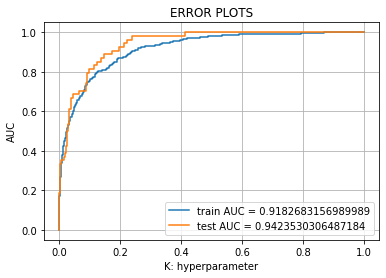

the maximum value of tpr*(1-fpr) 0.7014601669735395 for threshold 0.1
Model test Accuracy score is :  0.8706099815157117
Model test Recall score is :  0.8518518518518519
Model test Precision score is :  0.42592592592592593
Model test F1 score is :  0.5679012345679013
Model test AUC score is :  0.9423530306487184


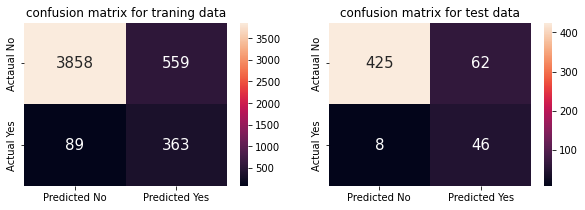

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(logreg2,X_train,X_test,y_train,y_test)

### Model 2: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(class_weight = 'balanced')

parameters = {'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10,20, 45, 75, 100, 135, 270, 500]}

DT_model_CV = GridSearchCV(DT_model, parameters, cv=5, scoring='f1', n_jobs=-1, return_train_score=True, verbose=10)
DT_model_CV = DT_model_CV.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",DT_model_CV.best_params_)
print("roc_auc :",DT_model_CV.best_score_)

Fitting 5 folds for each of 63 candidates, totalling 315 fits
tuned hpyerparameters :(best parameters)  {'max_depth': 10, 'min_samples_split': 5}
roc_auc : 0.5051861467707394


In [ ]:
# model with best hyperparameters:
DT_model2 = DecisionTreeClassifier(class_weight = 'balanced', max_depth = 10, min_samples_split = 5)
DT_model2=DT_model2.fit(X_train,y_train)

print("score",DT_model2.score(X_test,y_test))

score 0.8502772643253235


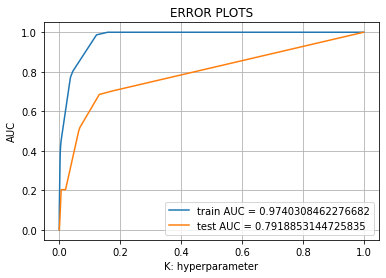

the maximum value of tpr*(1-fpr) 0.8660935925356777 for threshold 0.703
Model test Accuracy score is :  0.8502772643253235
Model test Recall score is :  0.6851851851851852
Model test Precision score is :  0.36633663366336633
Model test F1 score is :  0.4774193548387097
Model test AUC score is :  0.7918853144725835


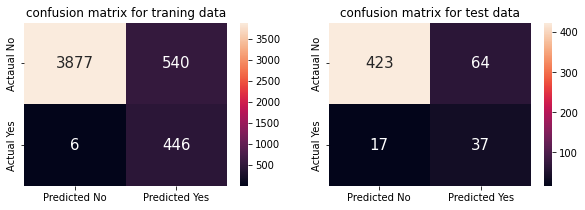

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(DT_model2,X_train,X_test,y_train,y_test)

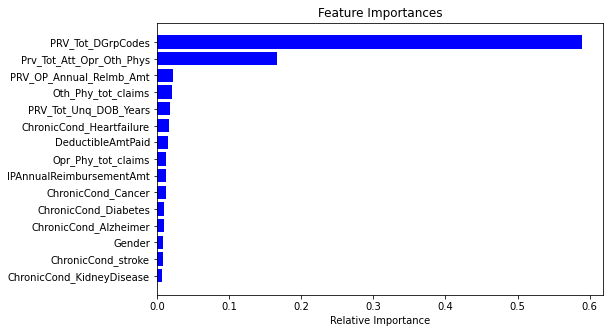

In [ ]:
features = X_train.columns
importances = DT_model2.feature_importances_
indices = (np.argsort(importances))[-15:]
plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(class_weight = 'balanced', random_state=42)

param_grid = { 
    'n_estimators': [300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


RF_CV = GridSearchCV(estimator=RF, param_grid=param_grid, cv= 5,scoring='f1', n_jobs=-1, return_train_score=True, verbose=10)
RF_CV.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",RF_CV.best_params_)
print("roc_auc :",RF_CV.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}
roc_auc : 0.5760860526763103


In [ ]:
RF2 = RandomForestClassifier(n_estimators = 300,max_features='auto',max_depth=8,criterion='entropy',
                             class_weight = 'balanced',n_jobs=-1,verbose=10, random_state=42)

RF2=RF2.fit(X_train,y_train)

print("score",RF2.score(X_test,y_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


building tree 1 of 300building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300building tree 7 of 300


building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300building tree 12 of 300

building tree 13 of 300building tree 14 of 300
building tree 15 of 300
building tree 16 of 300

building tree 17 of 300
building tree 18 of 300
building tree 19 of 300building tree 20 of 300

building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300
building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300building tree 38 of 300

building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
b

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    0.2s


building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75 of 300
building tree 76 of 300
building tree 77 of 300
building tree 78 of 300
building tree 79 of 300
building tree 80 of 300
building tree 81 of 300
building tree 82 of 300
building tree 83 of 300
building tree 84 of 300
building tree 85 of 300
building tree 86 of 300
building tree 87 of 300
building tree 88 of 300building tree 89 of 300



[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.4s


building tree 90 of 300
building tree 91 of 300
building tree 92 of 300
building tree 93 of 300
building tree 94 of 300
building tree 95 of 300
building tree 96 of 300
building tree 97 of 300
building tree 98 of 300
building tree 99 of 300
building tree 100 of 300
building tree 101 of 300
building tree 102 of 300
building tree 103 of 300
building tree 104 of 300
building tree 105 of 300
building tree 106 of 300
building tree 107 of 300building tree 108 of 300

building tree 109 of 300
building tree 110 of 300
building tree 111 of 300
building tree 112 of 300building tree 113 of 300

building tree 114 of 300
building tree 115 of 300
building tree 116 of 300
building tree 117 of 300building tree 118 of 300


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    0.6s



building tree 119 of 300building tree 120 of 300

building tree 121 of 300
building tree 122 of 300
building tree 123 of 300building tree 124 of 300

building tree 125 of 300
building tree 126 of 300
building tree 127 of 300
building tree 128 of 300
building tree 129 of 300
building tree 130 of 300
building tree 131 of 300
building tree 132 of 300
building tree 133 of 300
building tree 134 of 300
building tree 135 of 300
building tree 136 of 300
building tree 137 of 300
building tree 138 of 300
building tree 139 of 300


[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    0.9s


building tree 140 of 300
building tree 141 of 300
building tree 142 of 300
building tree 143 of 300
building tree 144 of 300
building tree 145 of 300
building tree 146 of 300
building tree 147 of 300
building tree 148 of 300
building tree 149 of 300
building tree 150 of 300
building tree 151 of 300
building tree 152 of 300
building tree 153 of 300building tree 154 of 300

building tree 155 of 300building tree 156 of 300

building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:    1.1s


building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300building tree 169 of 300

building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300building tree 177 of 300

building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300
building tree 196 of 300
building tree 197 of 300
building tree 198 of 300
building tree 199 of 300
building tree 200 of 300
building tree 201 of 300
building tree 202 of 300
building tree 203 of 300
building tree 204 of 300


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    1.5s


building tree 208 of 300

building tree 209 of 300
building tree 210 of 300
building tree 211 of 300
building tree 212 of 300
building tree 213 of 300
building tree 214 of 300
building tree 215 of 300
building tree 216 of 300building tree 217 of 300

building tree 218 of 300
building tree 219 of 300
building tree 220 of 300
building tree 221 of 300
building tree 222 of 300
building tree 223 of 300
building tree 224 of 300building tree 225 of 300

building tree 226 of 300
building tree 227 of 300
building tree 228 of 300
building tree 229 of 300
building tree 230 of 300building tree 231 of 300

building tree 232 of 300
building tree 233 of 300
building tree 234 of 300
building tree 235 of 300
building tree 236 of 300
building tree 237 of 300
building tree 238 of 300
building tree 239 of 300
building tree 240 of 300
building tree 241 of 300
building tree 242 of 300building tree 243 of 300

building tree 244 of 300
building tree 245 of 300
building tree 246 of 300
building tree 247 of 300

[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 249 tasks      | elapsed:    1.8s


building tree 253 of 300
building tree 254 of 300
building tree 255 of 300
building tree 256 of 300
building tree 257 of 300
building tree 258 of 300
building tree 259 of 300
building tree 260 of 300
building tree 261 of 300
building tree 262 of 300
building tree 263 of 300
building tree 264 of 300
building tree 265 of 300building tree 266 of 300

building tree 267 of 300
building tree 268 of 300
building tree 269 of 300
building tree 270 of 300
building tree 271 of 300
building tree 272 of 300
building tree 273 of 300
building tree 274 of 300
building tree 275 of 300
building tree 276 of 300
building tree 277 of 300building tree 278 of 300

building tree 279 of 300


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    2.0s


building tree 280 of 300
building tree 281 of 300
building tree 282 of 300
building tree 283 of 300
building tree 284 of 300
building tree 285 of 300building tree 286 of 300
building tree 287 of 300

building tree 288 of 300building tree 289 of 300

building tree 290 of 300
building tree 291 of 300
building tree 292 of 300
building tree 293 of 300building tree 294 of 300

building tree 295 of 300building tree 296 of 300

building tree 297 of 300
building tree 298 of 300
building tree 299 of 300building tree 300 of 300



[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    2.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    

score 0.9075785582255084


[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.1s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  97 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 129 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 165 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Para

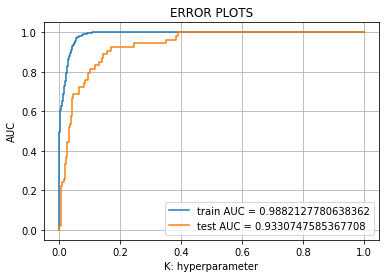

the maximum value of tpr*(1-fpr) 0.9181811624836463 for threshold 0.481
Model test Accuracy score is :  0.8983364140480592
Model test Recall score is :  0.7407407407407407
Model test Precision score is :  0.49382716049382713
Model test F1 score is :  0.5925925925925926
Model test AUC score is :  0.9330747585367708


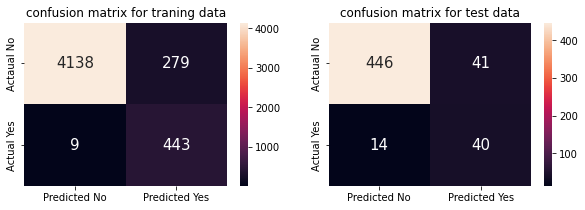

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(RF2,X_train,X_test,y_train,y_test)

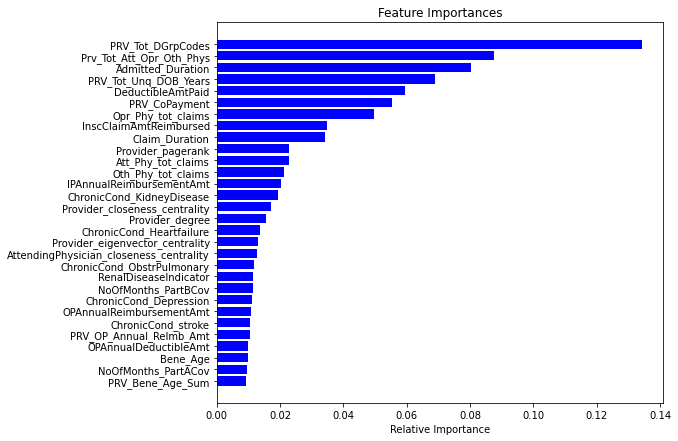

In [ ]:
features = X_train.columns
importances = RF2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model 4: Xg_Boost

In [ ]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV

XGB = xgb.XGBClassifier()

parameters = {"eta" : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] , "n_estimators" : [5,10,50, 75, 100], "scale_pos_weight": [0.2,1,2,5,10]}

XGB_CV = RandomizedSearchCV(XGB, parameters , cv=5, scoring='f1', n_jobs=-1,return_train_score=True, verbose=10)
XGB_CV.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",XGB_CV.best_params_)
print("roc_auc :",XGB_CV.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
tuned hpyerparameters :(best parameters)  {'scale_pos_weight': 10, 'n_estimators': 50, 'eta': 0.1}
roc_auc : 0.5777144993546027


In [ ]:
XGB2 = xgb.XGBClassifier(eta=0.1,n_estimators=50,n_jobs=-1, scale_pos_weight = 10)

XGB2=XGB2.fit(X_train,y_train)

print("score",XGB2.score(X_test,y_test))

score 0.9001848428835489


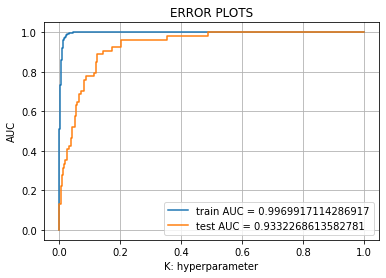

the maximum value of tpr*(1-fpr) 0.9652584243099369 for threshold 0.612
Model test Accuracy score is :  0.9094269870609981
Model test Recall score is :  0.6296296296296297
Model test Precision score is :  0.5396825396825397
Model test F1 score is :  0.5811965811965812
Model test AUC score is :  0.9332268613582781


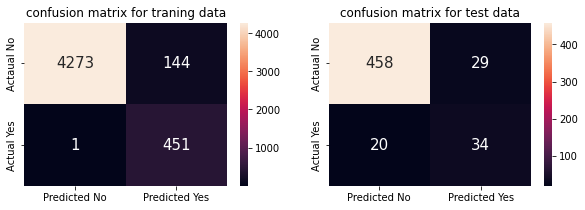

In [ ]:
model_f1_score, model_AUC_score = model_performence_check(XGB2,X_train,X_test,y_train,y_test)

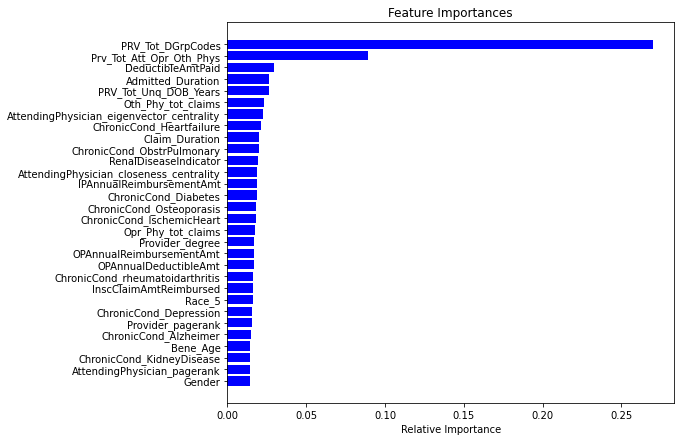

In [ ]:
features = X_train.columns
importances = XGB2.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(8,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()